In [1]:
import scanpy as sc
import squidpy as sq
import numpy as np
import seaborn as sns
import pandas as pd
import cell2location as c2l
import matplotlib
import os
import scipy
import scipy.sparse
import matplotlib.pyplot as plt

from matplotlib import rcParams
from cycler import cycler

rcParams['pdf.fonttype'] = 42 # enables correct plotting of text for PDFs
rcParams['figure.figsize'] = 6,6

/project/soft/linux64/anaconda/Anaconda3-2023.09-0-Linux-x86_64/lib/python3.11/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/project/soft/linux64/anaconda/Anaconda3-2023.09-0-Linux-x86_64/lib/python3.11/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
2024-07-17 12:28:03.128081: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


First, read in raw data to confirm stage of each tissue

In [9]:
metadata = pd.read_csv('/project/data/gew123/Spatial/pilot_e_montano_CosMx_data/input/slide_0_metadata_file_updated_tissue_meta_with_Patient_Info.csv')

/tmp/ipykernel_3474611/129147644.py:1: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv('/project/data/gew123/Spatial/pilot_e_montano_CosMx_data/input/slide_0_metadata_file_updated_tissue_meta_with_Patient_Info.csv')


In [18]:
metadata['tissue'].unique()

array(['tissue_01', 'tissue_02', 'tissue_03', 'tissue_04', 'tissue_05',
       'tissue_06', 'tissue_07', 'tissue_08', 'tissue_09', 'tissue_10',
       'tissue_11', 'tissue_12', 'tissue_13'], dtype=object)

In [39]:
for tissue in metadata['tissue'].unique():
    stage = metadata['stage'][metadata['tissue'] == tissue].unique()
    print(tissue, ': ', stage)

tissue_01 :  ['1_2']
tissue_02 :  ['4']
tissue_03 :  ['2_3']
tissue_04 :  ['4']
tissue_05 :  ['4']
tissue_06 :  ['2_3']
tissue_07 :  ['1' 1]
tissue_08 :  [3]
tissue_09 :  [3 '3']
tissue_10 :  ['unclear']
tissue_11 :  ['unclear']
tissue_12 :  ['3']
tissue_13 :  ['4']


Read in data and clean up

In [2]:
adata = sc.read_h5ad('/project/data/gew123/Spatial/Annotated_objects/spatial_c2l_labels_10neighbors.h5ad')

In [48]:
adata

AnnData object with n_obs × n_vars = 182735 × 940
    obs: 'fov', 'Area', 'AspectRatio', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height', 'Mean.MembraneStain', 'Max.MembraneStain', 'Mean.PanCK', 'Max.PanCK', 'Mean.CD45', 'Max.CD45', 'Mean.DAPI', 'Max.DAPI', 'tissue', 'section', 'subtype', 'stage', 'cell_ID', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_NegPrb', 'log1p_total_counts_NegPrb', 'pct_counts_NegPrb', 'n_genes', 'leiden_25_0.7', 'leiden_25_0.8', 'leiden_25_1.0', 'sample', '_indices', '_scvi_batch', '_scvi_labels', 'B cells', 'Cytotoxic (CD8+) T cells', 'Cytotoxic (CD8+/IGKC+) T cells', 'Helper (CD4+) T cells', 'Macrophages/monocytes', 'Mast cells', 'NK cells', 'Naïve T cells', 'Plasma cells', 'Proliferating T cells', 'Sympathetic neuronal/glial cells', 'Sympathetic neurons', 'Neuroblasts', 

In [54]:
# Choose columns to keep
cols = ['fov', 'Area', 'AspectRatio', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height',
        'Mean.MembraneStain', 'Max.MembraneStain', 'Mean.PanCK', 'Max.PanCK', 'Mean.CD45', 'Max.CD45', 'Mean.DAPI', 'Max.DAPI',
        'tissue', 'section', 'subtype', 'stage', 'cell_ID',
        'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts',
        'c2l_predicted', 'grouped_annotations', 'grouped_annotations2']
keys = ['c2l_predicted_colors', 'grouped_annotations2_colors', 'grouped_annotations_colors', 'mod', 'log1p', 'neighbors', 'pca', 'tissue_colors', 'umap']

adata.obs = adata.obs[cols]
adata.uns = {key: adata.uns[key] for key in keys}

### Clustering

In [ ]:
resolutions = [0.1, 0.3, 0.5, 0.7, 1.0]
for resolution in resolutions:
    print('Clustering at', resolution)
    sc.tl.leiden(adata, key_added=f'leiden_{resolution}', resolution=resolution) 

/project/soft/linux64/anaconda/Anaconda3-2023.09-0-Linux-x86_64/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


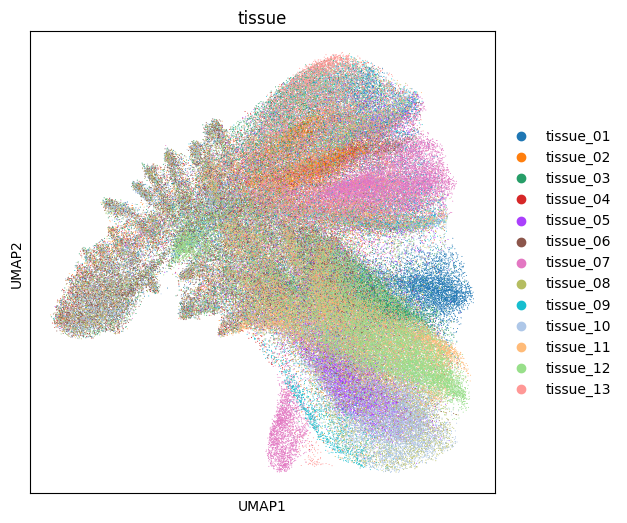

/project/soft/linux64/anaconda/Anaconda3-2023.09-0-Linux-x86_64/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


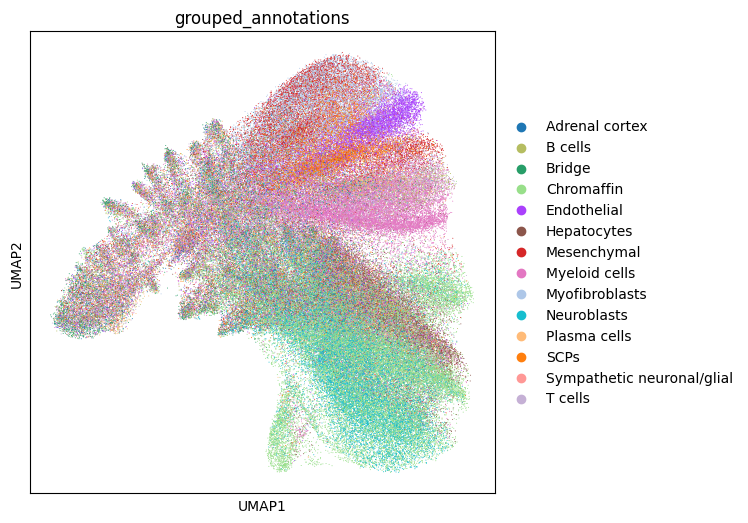

In [59]:
# Plot
sc.settings.figdir = '/project/data/gew123/Spatial/Figures'
sc.pl.umap(adata, color=['tissue'], size=2, wspace=0.4, save='testing_spatial_clustering.png')
sc.pl.umap(adata, color=['grouped_annotations'], size=2, wspace=0.4, save='testing_spatial_clustering_annotated.png')

In [70]:
# Save work
adata.write('/project/data/gew123/Spatial/Annotated_objects/spatial_c2l_labels_10neighbors.h5ad')

Cluster at various resolutions

Clustering at resolution 0.2


/project/soft/linux64/anaconda/Anaconda3-2023.09-0-Linux-x86_64/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


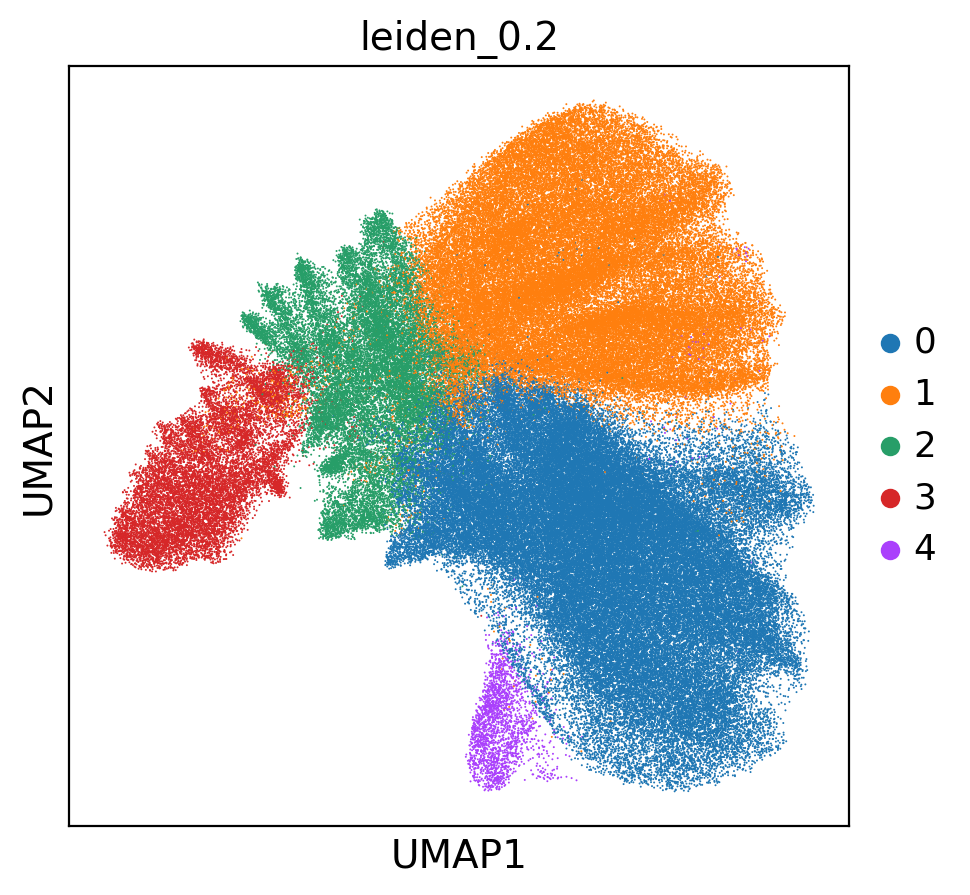

Clustering at resolution 0.5


/project/soft/linux64/anaconda/Anaconda3-2023.09-0-Linux-x86_64/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


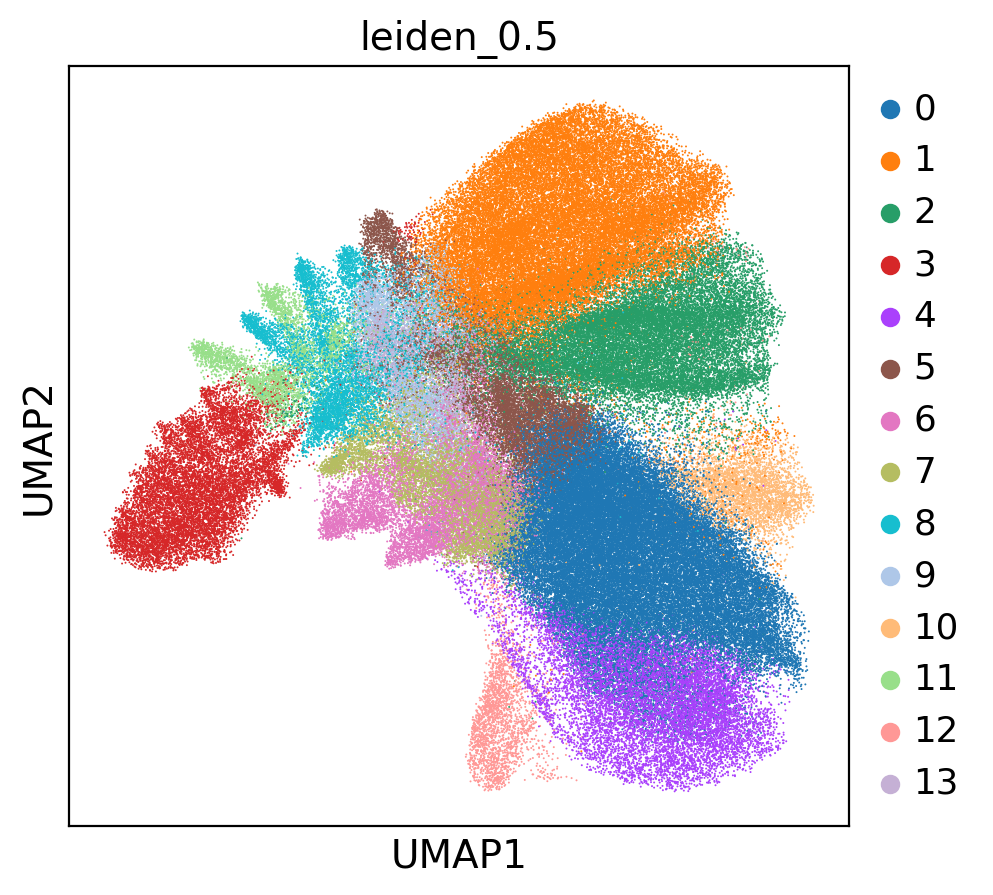

Clustering at resolution 0.7


/project/soft/linux64/anaconda/Anaconda3-2023.09-0-Linux-x86_64/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


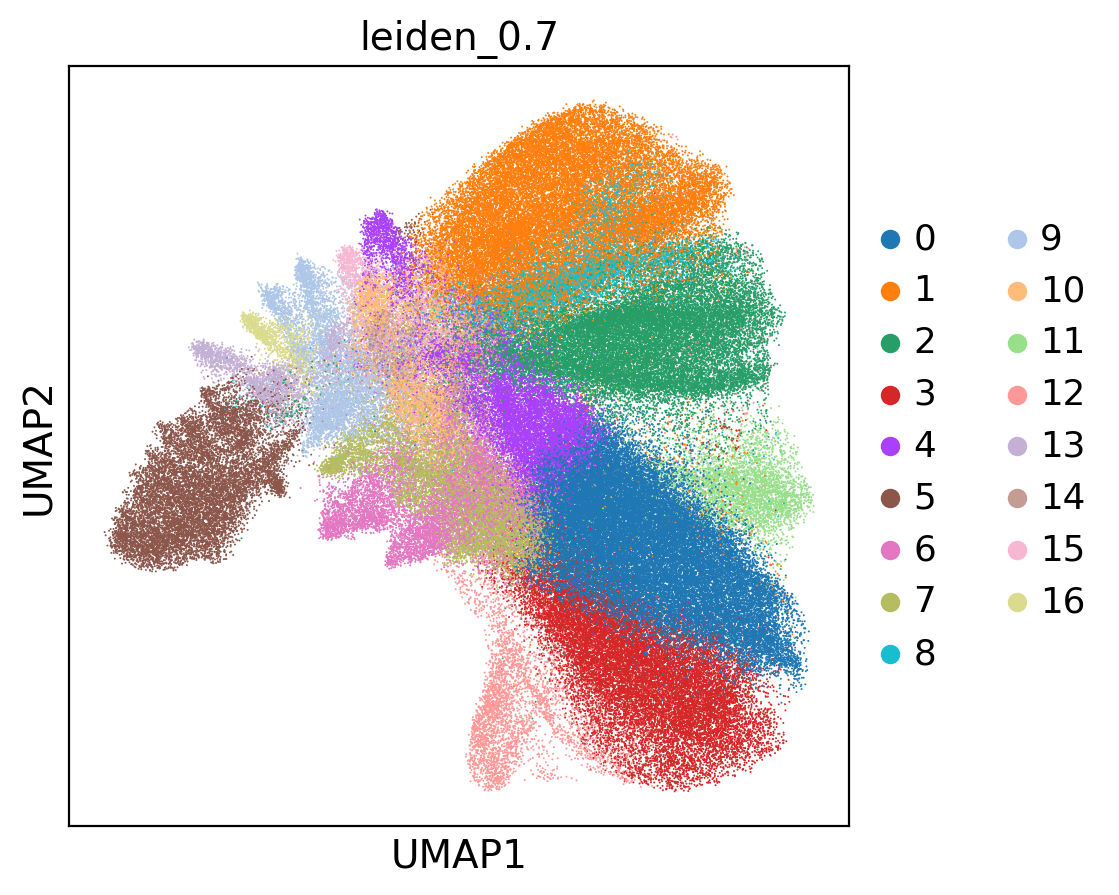

Clustering at resolution 0.8


/project/soft/linux64/anaconda/Anaconda3-2023.09-0-Linux-x86_64/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


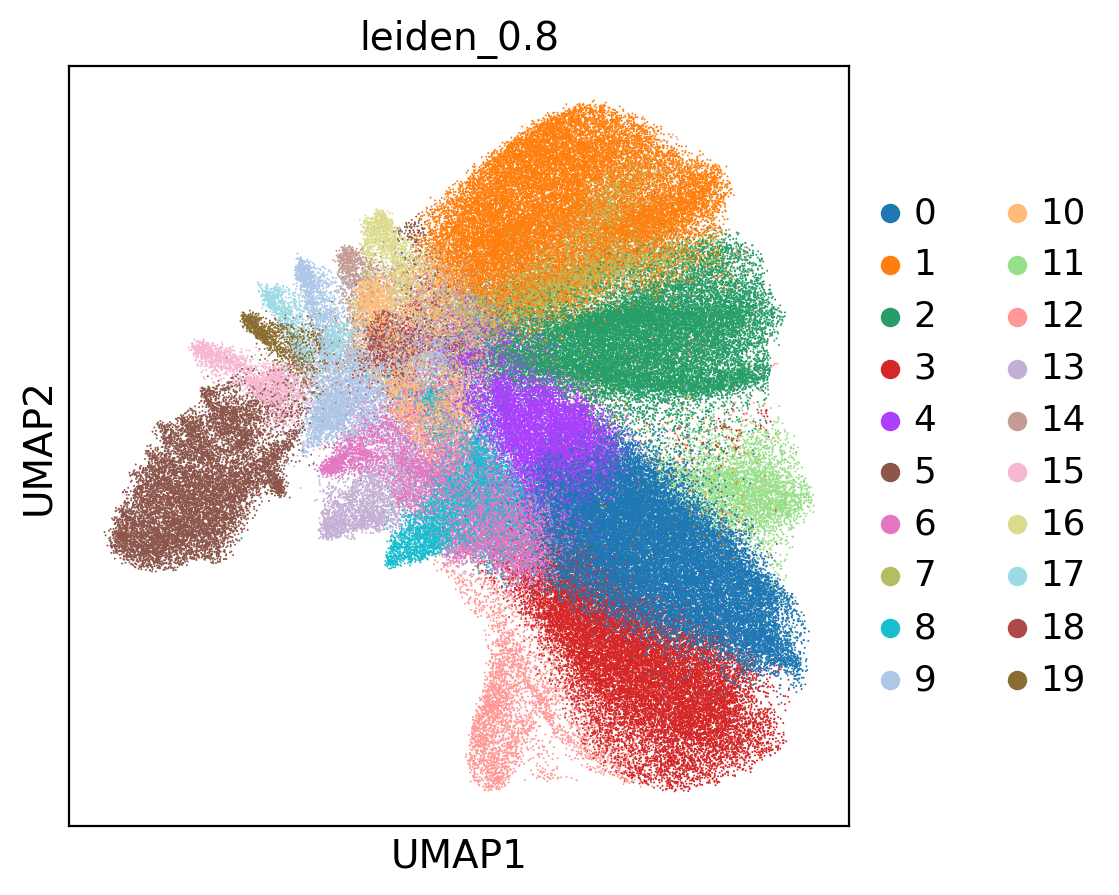

Clustering at resolution 1.0


/project/soft/linux64/anaconda/Anaconda3-2023.09-0-Linux-x86_64/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


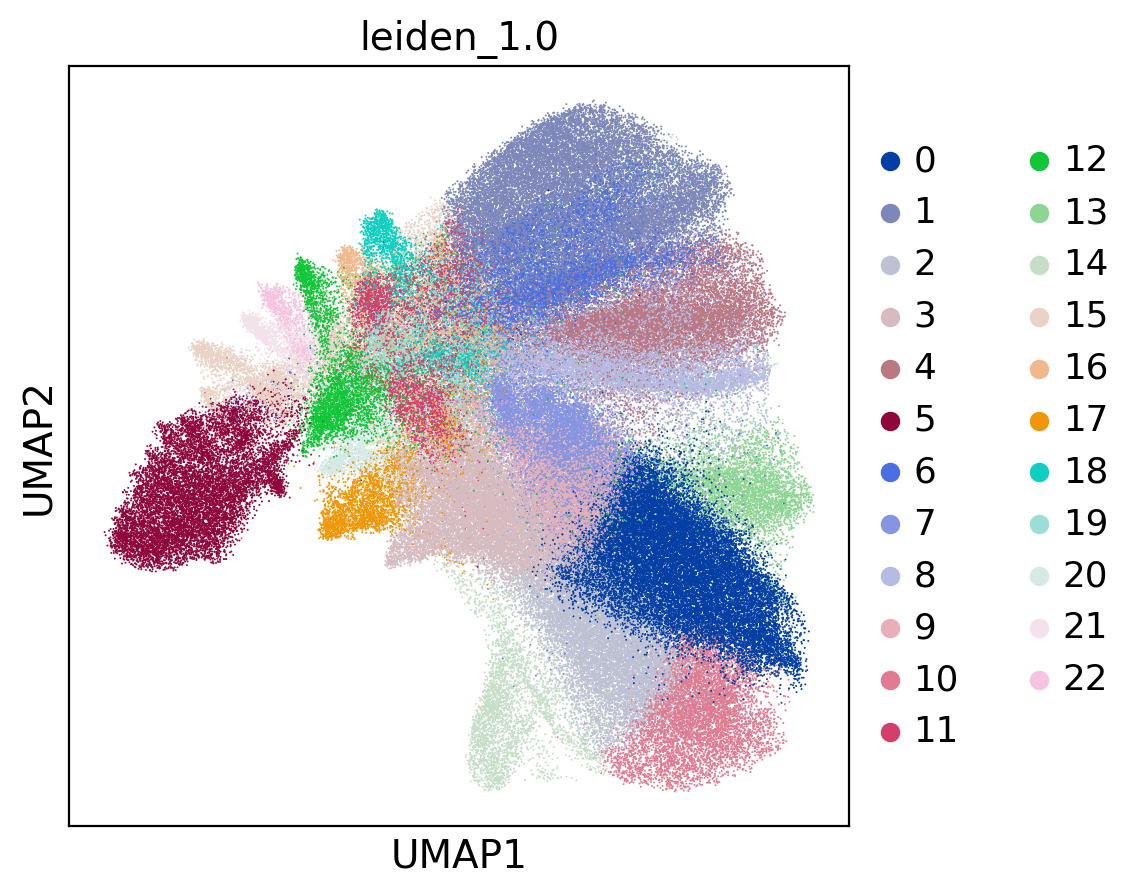

In [4]:
sc.settingsfigdir = '/project/data/gew123/Spatial/Figures/clusterings'
sc.set_figure_params(dpi=100, dpi_save=400, figsize=(5,5))

resolutions = [0.2, 0.5, 0.7, 0.8, 1.0]
for i in resolutions:
    print('Clustering at resolution', i)
    sc.tl.leiden(adata, resolution=i, key_added=f'leiden_{i}') # Could change resolution
    sc.pl.umap(adata, color=[f'leiden_{i}'], size=2, wspace=0.4, save=f'_clustered_{i}.png')

Plot tissue spatially

In [24]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

colors[8:9], colors[9:10] = colors[9:10], colors[8:9] # Swap myofibroblast and neuroblastoma colors (colors 8 and 9)
colors[1:2], colors[7:8] = colors[7:8], colors[1:2] # Swap b cells and myeloid colors (colors 1 and 7)
colors[11:12], colors[3:4] = colors[3:4], colors[11:12] # Swap chromaffin and scp colors (colors 2 and 11)
colors[11:12], colors[6:7] = colors[6:7], colors[11:12] # Swap neuroblast and plasma cell colors (colors 2 and 11)
colors[7:8], colors[11:12] = colors[11:12], colors[7:8]
colors[7:8], colors[10:11] = colors[10:11], colors[7:8] # Swap myeloid and plasma

In [6]:
df = pd.DataFrame(adata.obs) # Convert to df
df.head()

fov   Area  AspectRatio  CenterX_global_px  CenterY_global_px  Width  \
3_1   1  10996         2.06       95170.997899       99963.034702    183   
5_1   1   9341         0.82       95468.997899       99760.034702    102   
6_1   1   4901         1.26       95379.997899       99721.034702     92   
7_1   1   8042         0.76       95249.997899       99688.034702     93   
8_1   1   3137         0.72       95412.997899       99681.034702     63   

     Height  Mean.MembraneStain  Max.MembraneStain  Mean.PanCK  ...  section  \
3_1      89                  52               4561          37  ...       E4   
5_1     124                 332               2770         341  ...       E4   
6_1      73                 340                692         867  ...       E4   
7_1     123                 380               1287         618  ...       E4   
8_1      87                 569               1201         915  ...       E4   

                           subtype  \
3_1  differentiating neuroblastoma   
5_1  differentiating neuroblastoma   
6_1  differentiating neuroblastoma   
7_1  differentiating neuroblastoma   
8_1  differentiating neuroblastoma   

                                                 stage  cell_ID  \
3_1  3_1        1_2\n5_1        1_2\n6_1        1_2...        3   
5_1  3_1        1_2\n5_1        1_2\n6_1        1_2...        5   
6_1  3_1        1_2\n5_1        1_2\n6_1        1_2...        6   
7_1  3_1        1_2\n5_1        1_2\n6_1        1_2...        7   
8_1  3_1        1_2\n5_1        1_2\n6_1        1_2...        8   

     n_genes_by_counts log1p_n_genes_by_counts total_counts  \
3_1                 75                4.330733           92   
5_1                 36                3.610918           48   
6_1                 43                3.784190           83   
7_1                 11                2.484907           12   
8_1                 34                3.555348           44   

         c2l_predicted grouped_annotations  grouped_annotations2  
3_1        Hepatocytes         Hepatocytes           Hepatocytes  
5_1  Endothelial cells         Endothelial           Endothelial  
6_1  Mesenchymal cells         Mesenchymal           Mesenchymal  
7_1         Mast cells       Myeloid cells          Immune cells  
8_1        Hepatocytes         Hepatocytes           Hepatocytes  

[5 rows x 26 columns]

/tmp/ipykernel_3480599/3113141812.py:4: UserWarning: 
The palette list has fewer values (10) than needed (14) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=df, x='CenterX_global_px', y='CenterY_global_px', hue='grouped_annotations',


<Axes: xlabel='CenterX_global_px', ylabel='CenterY_global_px'>

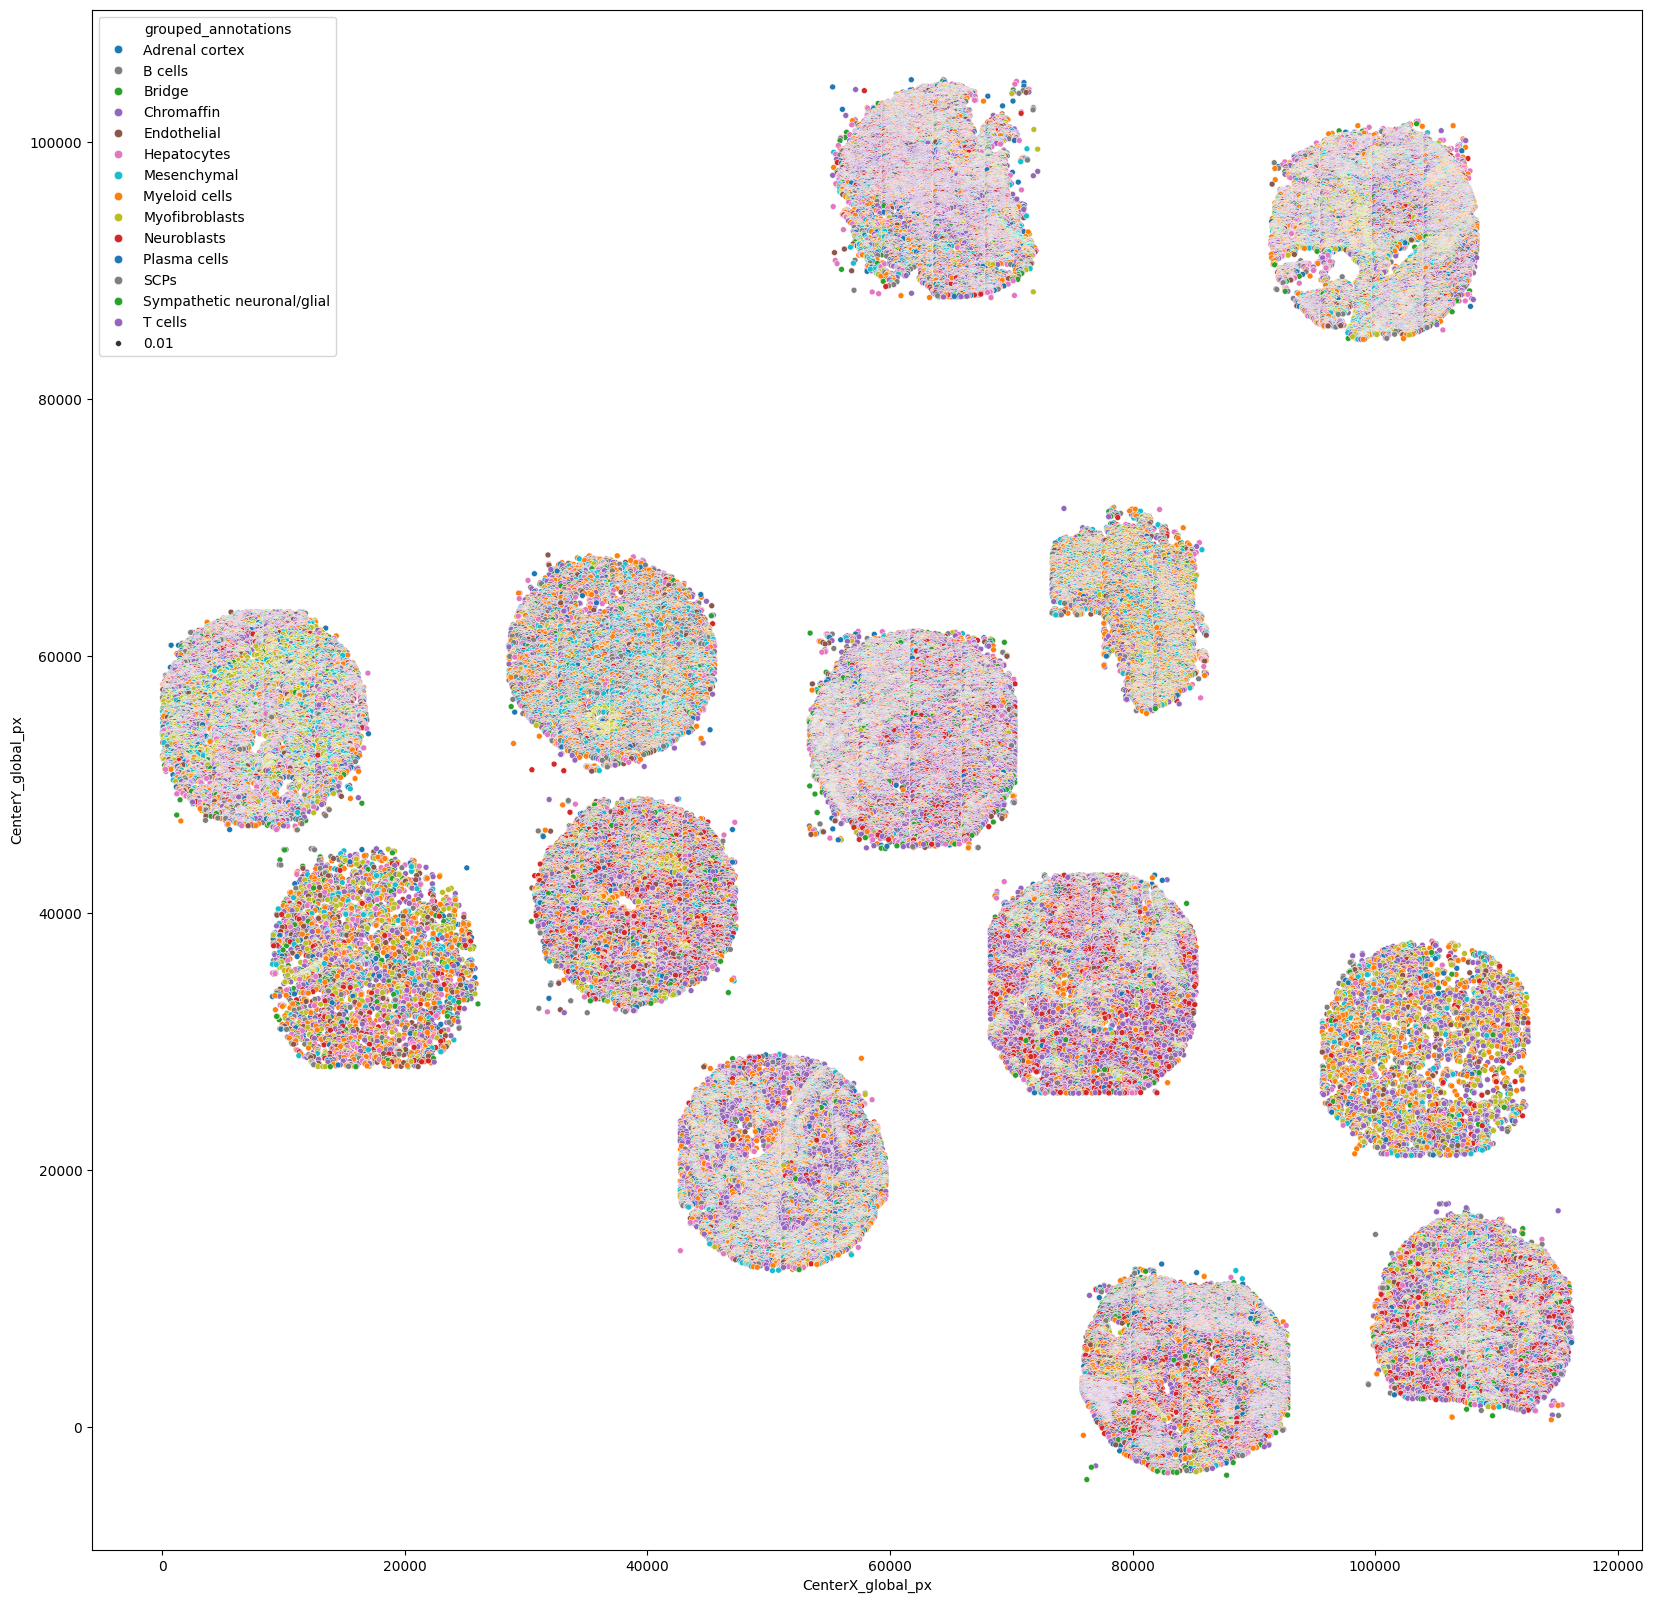

In [25]:
# All tissues
import matplotlib as plt
plt.rcParams['figure.figsize'] = [20, 20]
sns.scatterplot(data=df, x='CenterX_global_px', y='CenterY_global_px', hue='grouped_annotations', 
            palette=colors, size=0.01)



/tmp/ipykernel_3480599/284301324.py:5: UserWarning: 
The palette list has fewer values (10) than needed (14) and will cycle, which may produce an uninterpretable plot.
  fig1 = sns.scatterplot(data=df[df['tissue']=='tissue_01'], x='CenterX_global_px', y='CenterY_global_px', hue='grouped_annotations', palette=colors, size=0.01)
/tmp/ipykernel_3480599/284301324.py:6: UserWarning: 
The palette list has fewer values (10) than needed (14) and will cycle, which may produce an uninterpretable plot.
  fig2 = sns.scatterplot(data=df[df['tissue']=='tissue_07'], x='CenterX_global_px', y='CenterY_global_px', hue='grouped_annotations', palette=colors, size=0.01)


AttributeError: 'Axes' object has no attribute 'show'

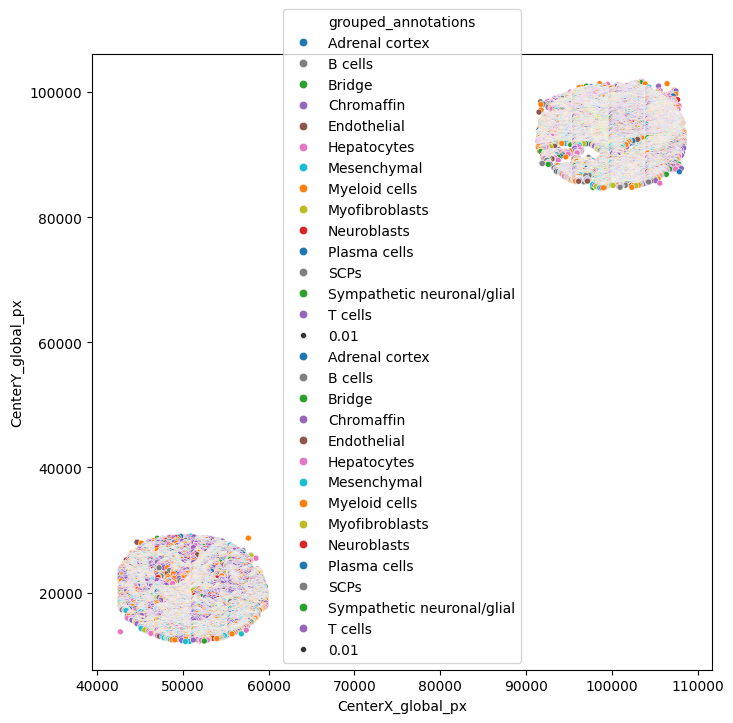

In [31]:
# Individual tissue
plt.rcParams['figure.figsize'] = [8, 8]

# Plot stage 1 / 1/2 
fig1 = sns.scatterplot(data=df[df['tissue']=='tissue_01'], x='CenterX_global_px', y='CenterY_global_px', hue='grouped_annotations', palette=colors, size=0.01)
fig2 = sns.scatterplot(data=df[df['tissue']=='tissue_07'], x='CenterX_global_px', y='CenterY_global_px', hue='grouped_annotations', palette=colors, size=0.01)

plt.show(fig2.show

# Later Analysis